EDA

In [ ]:
#connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

#load tools
import pandas as pd
import numpy as np

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Portfolio Projects/FinTech Project/'

#loading 3 key tables
customers = pd.read_csv(path + 'olist_customers_dataset.csv')
orders = pd.read_csv(path + 'olist_orders_dataset.csv')
payments = pd.read_csv(path + 'olist_order_payments_dataset.csv')
order_items = pd.read_csv(path + 'olist_order_items_dataset.csv')


print(f"Customers: {len(customers)} rows")
print(f"Orders: {len(orders)} rows")
print(f"Payments: {len(payments)} rows")
print(f"Items: {len(order_items):,}")

Customers: 99441 rows
Orders: 99441 rows
Payments: 103886 rows
Items: 112,650


In [ ]:
#what's in the customers table
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
#what's in the orders table
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
#payment information
payments.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


In [ ]:
#counting basic things
print("How many customers?", len(customers))
print("How many orders?", len(orders))
print("How many payment records?", len(payments))

How many customers? 99441
How many orders? 99441
How many payment records? 103886


In [ ]:
#what payment methods do people use?
print(payments['payment_type'].value_counts())

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


In [ ]:
#adding up all money from payments
total_money = payments['payment_value'].sum()
print(f"Total revenue: R$ {total_money:,.2f}")

Total revenue: R$ 16,008,872.12


In [ ]:
#the average payment
average_payment = payments['payment_value'].mean()
print(f"Average payment: R$ {average_payment:.2f}")

Average payment: R$ 154.10


In [ ]:
#are there any empty cells in customers?
print("Missing data in customers:")
print(customers.isnull().sum())

Missing data in customers:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [ ]:
#are there any empty cells in orders?
print("Missing data in orders:")
print(orders.isnull().sum())

Missing data in orders:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


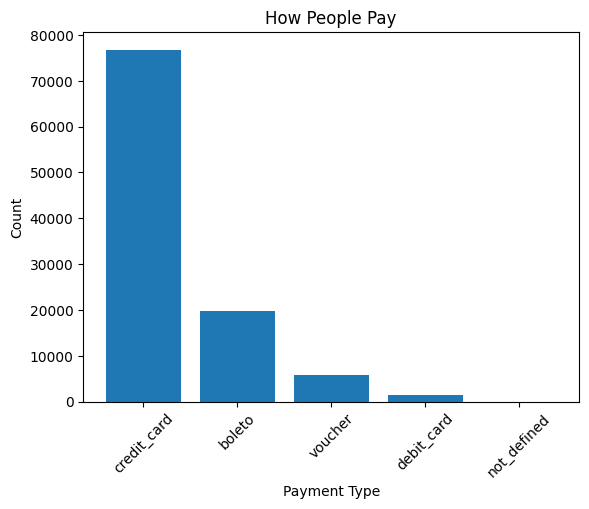

In [ ]:
import matplotlib.pyplot as plt

#count each payment type
payment_counts = payments['payment_type'].value_counts()

#bar chart
plt.bar(payment_counts.index, payment_counts.values)
plt.title('How People Pay')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#turning date text into actual dates
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

#the date range
print("First order:", orders['order_purchase_timestamp'].min())
print("Last order:", orders['order_purchase_timestamp'].max())

First order: 2016-09-04 21:15:19
Last order: 2018-10-17 17:30:18


In [ ]:
#how many orders each customer made
orders_per_customer = orders.groupby('customer_id').size()

#how many bought only once?
one_time = (orders_per_customer == 1).sum()

#how many bought multiple times?
repeat = (orders_per_customer > 1).sum()

print(f"One-time customers: {one_time}")
print(f"Repeat customers: {repeat}")

One-time customers: 99441
Repeat customers: 0


In [ ]:
print("=" * 50)
print("WHAT WE LEARNED")
print("=" * 50)
print()
print("~100,000 orders")
print("~96,000 customers")
print("Data is from 2016-2018")
print("Most people pay with credit card")
print("Very few customers buy twice (churn problem!)")
print("Data quality is good")
print()

WHAT WE LEARNED

~100,000 orders
~96,000 customers
Data is from 2016-2018
Most people pay with credit card
Very few customers buy twice (churn problem!)
Data quality is good



In [ ]:
#load the order items table
order_items = pd.read_csv(path + 'olist_order_items_dataset.csv')

print(order_items.head())
print(f"\nTotal items sold: {len(order_items):,}")

                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.7

In [ ]:
#how many items in each order?
items_per_order = order_items.groupby('order_id').size()

print("Average items per order:", items_per_order.mean())
print("Most items in one order:", items_per_order.max())
print("Most orders have this many items:", items_per_order.mode()[0])

Average items per order: 1.1417306873695092
Most items in one order: 21
Most orders have this many items: 1


In [ ]:
#loading products
products = pd.read_csv(path + 'olist_products_dataset.csv')

print(products.head())
print(f"\nTotal products: {len(products):,}")

                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0       

In [ ]:
#which categories sell most?
category_counts = products['product_category_name'].value_counts().head(10)

print("Top 10 product categories:")
print(category_counts)

Top 10 product categories:
product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: count, dtype: int64


In [ ]:
#how many people use installment payments?
installment_stats = payments['payment_installments'].describe()

print(installment_stats)

print("\nHow many payments used installments?")
with_installments = (payments['payment_installments'] > 1).sum()
total_payments = len(payments)
print(f"{with_installments:,} out of {total_payments:,} ({with_installments/total_payments*100:.1f}%)")

count    103886.000000
mean          2.853349
std           2.687051
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          24.000000
Name: payment_installments, dtype: float64

How many payments used installments?
51,338 out of 103,886 (49.4%)


In [ ]:
#which payment type has highest average value?
avg_by_type = payments.groupby('payment_type')['payment_value'].mean().sort_values(ascending=False)

print("Average payment value by type:")
print(avg_by_type.round(2))

Average payment value by type:
payment_type
credit_card    163.32
boleto         145.03
debit_card     142.57
voucher         65.70
not_defined      0.00
Name: payment_value, dtype: float64


In [ ]:
#extract month from order date
orders['month'] = orders['order_purchase_timestamp'].dt.to_period('M')

#count orders per month
monthly_orders = orders.groupby('month').size()

print("Orders per month:")
print(monthly_orders)

Orders per month:
month
2016-09       4
2016-10     324
2016-12       1
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
2017-08    4331
2017-09    4285
2017-10    4631
2017-11    7544
2017-12    5673
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, dtype: int64


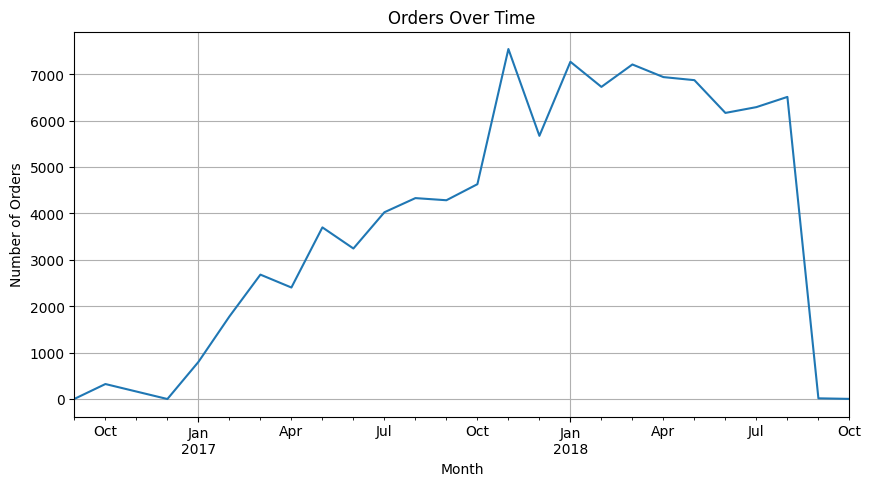

In [ ]:
#plot monthly orders
monthly_orders.plot(kind='line', figsize=(10, 5))
plt.title('Orders Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

In [ ]:
#combining orders and payments to see order totals; for preview only

#for each order, summing up all payments
order_totals = payments.groupby('order_id')['payment_value'].sum().reset_index()
order_totals.columns = ['order_id', 'total_payment']

print("Order totals:")
print(order_totals.head(10))

print(f"\nHighest order value: R$ {order_totals['total_payment'].max():.2f}")
print(f"Lowest order value: R$ {order_totals['total_payment'].min():.2f}")

Order totals:
                           order_id  total_payment
0  00010242fe8c5a6d1ba2dd792cb16214          72.19
1  00018f77f2f0320c557190d7a144bdd3         259.83
2  000229ec398224ef6ca0657da4fc703e         216.87
3  00024acbcdf0a6daa1e931b038114c75          25.78
4  00042b26cf59d7ce69dfabb4e55b4fd9         218.04
5  00048cc3ae777c65dbb7d2a0634bc1ea          34.59
6  00054e8431b9d7675808bcb819fb4a32          31.75
7  000576fe39319847cbb9d288c5617fa6         880.75
8  0005a1a1728c9d785b8e2b08b904576c         157.60
9  0005f50442cb953dcd1d21e1fb923495          65.39

Highest order value: R$ 13664.08
Lowest order value: R$ 0.00


Top 10 states with most customers:
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: count, dtype: int64


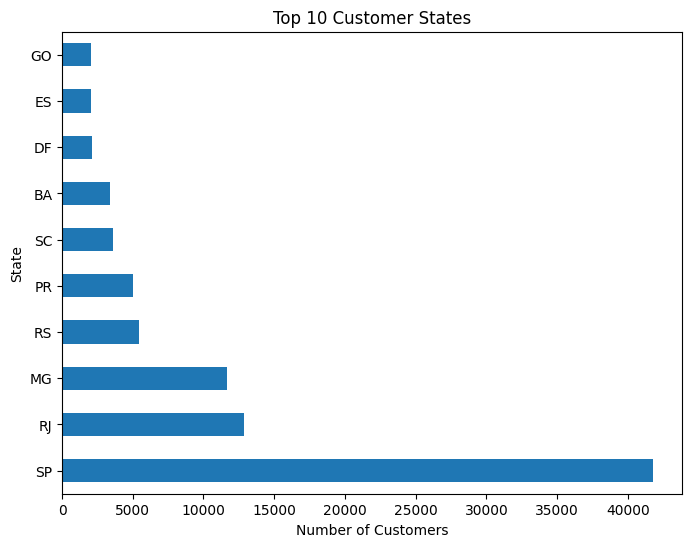

In [ ]:
#where are customers located?
top_states = customers['customer_state'].value_counts().head(10)

print("Top 10 states with most customers:")
print(top_states)

#simple chart
top_states.plot(kind='barh', figsize=(8, 6))
plt.title('Top 10 Customer States')
plt.xlabel('Number of Customers')
plt.ylabel('State')
plt.show()

In [ ]:
print("=" * 60)
print("EXPLORATION COMPLETE - KEY FINDINGS")
print("=" * 60)
print()
print("DATASET OVERVIEW:")
print(f"  • {len(orders):,} orders")
print(f"  • {len(customers):,} customers")
print(f"  • {len(order_items):,} items sold")
print(f"  • R$ {payments['payment_value'].sum():,.2f} total revenue")
print()
print("FINTECH INSIGHTS:")
print(f"  • Credit card is most popular payment method")
print(f"  • {(payments['payment_installments'] > 1).sum()/len(payments)*100:.1f}% use installment payments")
print(f"  • Average payment: R$ {payments['payment_value'].mean():.2f}")
print()
print("BUSINESS INSIGHTS:")
print(f"  • Average order has {order_items.groupby('order_id').size().mean():.1f} items")
print(f"  • Most customers from: {customers['customer_state'].mode()[0]}")
print(f"  • Data spans: 2016-2018")
print()
print("DATA QUALITY:")
print("  •Good overall quality")
print("  •Some missing delivery dates")
print("  •Ready for analysis")

EXPLORATION COMPLETE - KEY FINDINGS

DATASET OVERVIEW:
  • 99,441 orders
  • 99,441 customers
  • 112,650 items sold
  • R$ 16,008,872.12 total revenue

FINTECH INSIGHTS:
  • Credit card is most popular payment method
  • 49.4% use installment payments
  • Average payment: R$ 154.10

BUSINESS INSIGHTS:
  • Average order has 1.1 items
  • Most customers from: SP
  • Data spans: 2016-2018

DATA QUALITY:
  •Good overall quality
  •Some missing delivery dates
  •Ready for analysis


Data Cleaning

In [ ]:
#only completed orders
print(f"Before: {len(orders):,} orders")

#delivered orders only
orders_clean = orders[orders['order_status'] == 'delivered'].copy()

print(f"After: {len(orders_clean):,} orders")
print(f"Removed: {len(orders) - len(orders_clean):,} incomplete orders")

Before: 99,441 orders
After: 96,478 orders
Removed: 2,963 incomplete orders


In [ ]:
#converting dates
orders_clean['order_purchase_timestamp'] = pd.to_datetime(orders_clean['order_purchase_timestamp'])

#month and year
orders_clean['order_month'] = orders_clean['order_purchase_timestamp'].dt.to_period('M')
orders_clean['order_year'] = orders_clean['order_purchase_timestamp'].dt.year

In [ ]:
#combining multiple payments per order
payment_totals = payments.groupby('order_id').agg({
    'payment_value': 'sum',
    'payment_installments': 'max'
}).reset_index()

payment_totals.columns = ['order_id', 'total_payment', 'max_installments']

print(f"Orders with payments: {len(payment_totals):,}")

Orders with payments: 99,440


In [ ]:
#most common payment method per order
primary_payment = payments.groupby('order_id')['payment_type'].agg(
    lambda x: x.value_counts().index[0]
).reset_index()

primary_payment.columns = ['order_id', 'payment_method']

In [ ]:
#joining all tables together
master = orders_clean.copy()

#adding customer info
master = master.merge(customers[['customer_id', 'customer_city', 'customer_state']],
                      on='customer_id', how='left')

#adding payment info
master = master.merge(payment_totals, on='order_id', how='left')
master = master.merge(primary_payment, on='order_id', how='left')

print(f"Combined dataset: {len(master):,} rows")

Combined dataset: 96,478 rows


In [ ]:
#only what we need
columns_to_keep = [
    'order_id',
    'customer_id',
    'order_purchase_timestamp',
    'order_month',
    'order_year',
    'customer_city',
    'customer_state',
    'total_payment',
    'max_installments',
    'payment_method'
]

master_clean = master[columns_to_keep].copy()

print(f"Final shape: {master_clean.shape}")
print("\nColumns:")
for col in master_clean.columns:
    print(f"  • {col}")

Final shape: (96478, 10)

Columns:
  • order_id
  • customer_id
  • order_purchase_timestamp
  • order_month
  • order_year
  • customer_city
  • customer_state
  • total_payment
  • max_installments
  • payment_method


In [ ]:
#missing data
missing = master_clean.isnull().sum()

if missing.sum() == 0:
    print("No missing values!")
else:
    for col in master_clean.columns:
        if missing[col] > 0:
            print(f"  {col}: {missing[col]:,}")

  total_payment: 1
  max_installments: 1
  payment_method: 1


In [ ]:
#removing orders without payment data
master_clean = master_clean.dropna(subset=['total_payment', 'payment_method'])

In [ ]:
print("=" * 60)
print("CLEANED DATA SUMMARY")
print("=" * 60)

print(f"\nTotal orders: {len(master_clean):,}")
print(f"Total customers: {master_clean['customer_id'].nunique():,}")
print(f"Total revenue: R$ {master_clean['total_payment'].sum():,.2f}")
print(f"Average order: R$ {master_clean['total_payment'].mean():.2f}")

print("\nPayment methods:")
print(master_clean['payment_method'].value_counts())

print("\nTop 5 states:")
print(master_clean['customer_state'].value_counts().head())

CLEANED DATA SUMMARY

Total orders: 96,477
Total customers: 96,477
Total revenue: R$ 15,422,461.77
Average order: R$ 159.86

Payment methods:
payment_method
credit_card    73104
boleto         19191
voucher         2698
debit_card      1484
Name: count, dtype: int64

Top 5 states:
customer_state
SP    40500
RJ    12350
MG    11354
RS     5345
PR     4923
Name: count, dtype: int64


In [ ]:
#final result
master_clean.head(10)

,order_id,customer_id,order_purchase_timestamp,order_month,order_year,customer_city,customer_state,total_payment,max_installments,payment_method
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10,2017,sao paulo,SP,38.71,1.0,voucher
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07,2018,barreiras,BA,141.46,1.0,boleto
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08,2018,vianopolis,GO,179.12,3.0,credit_card
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11,2017,sao goncalo do amarante,RN,72.20,1.0,credit_card
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02,2018,santo andre,SP,28.62,1.0,credit_card
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,2017-07-09 21:57:05,2017-07,2017,congonhinhas,PR,175.26,6.0,credit_card
6,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,2017-05-16 13:10:30,2017-05,2017,nilopolis,RJ,75.16,3.0,credit_card
7,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,2017-01-23 18:29:09,2017-01,2017,faxinalzinho,RS,35.95,1.0,boleto
8,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,2017-07-29 11:55:02,2017-07,2017,sorocaba,SP,169.76,1.0,voucher
9,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,2017-05-16 19:41:10,2017-05,2017,rio de janeiro,RJ,259.06,1.0,credit_card


In [ ]:
import os

#creating the folder
processed_path = '/content/drive/MyDrive/Portfolio Projects/Fintech_Customer_Analytics/data/processed/'
os.makedirs(processed_path, exist_ok=True)

# saving the data
master_clean.to_csv(processed_path + 'orders_clean.csv', index=False)

SQL Exploratory Analysis

In [ ]:
import sqlite3
import pandas as pd

#SQL database
conn = sqlite3.connect('ecommerce.db')

#loading data
clean_data = pd.read_csv('/content/drive/MyDrive/Portfolio Projects/Fintech_Customer_Analytics/data/processed/orders_clean.csv')

#importing to SQL
clean_data.to_sql('orders', conn, if_exists='replace', index=False)

96477

In [ ]:
#test
test_query = "SELECT COUNT(*) as total_orders FROM orders"
result = pd.read_sql(test_query, conn)

print(result)

   total_orders
0         96477


In [ ]:
#what columns we have
structure_query = "PRAGMA table_info(orders)"
columns = pd.read_sql(structure_query, conn)

print(columns[['name', 'type']])

                       name     type
0                  order_id     TEXT
1               customer_id     TEXT
2  order_purchase_timestamp     TEXT
3               order_month     TEXT
4                order_year  INTEGER
5             customer_city     TEXT
6            customer_state     TEXT
7             total_payment     REAL
8          max_installments     REAL
9            payment_method     TEXT


EDA in SQL

In [ ]:
#business metrics

query1 = """
SELECT
    COUNT(*) as total_orders,
    COUNT(DISTINCT customer_id) as total_customers,
    ROUND(SUM(total_payment), 2) as total_revenue,
    ROUND(AVG(total_payment), 2) as avg_order_value,
    ROUND(MIN(total_payment), 2) as min_order,
    ROUND(MAX(total_payment), 2) as max_order
FROM orders
"""

result1 = pd.read_sql(query1, conn)
print(result1.to_string(index=False))

 total_orders  total_customers  total_revenue  avg_order_value  min_order  max_order
        96477            96477    15422461.77           159.86       9.59   13664.08


In [ ]:
#revenue by payment method

query2 = """
SELECT
    payment_method,
    COUNT(*) as num_orders,
    ROUND(SUM(total_payment), 2) as total_revenue,
    ROUND(AVG(total_payment), 2) as avg_order_value,
    ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM orders), 2) as pct_of_orders
FROM orders
GROUP BY payment_method
ORDER BY total_revenue DESC
"""

result2 = pd.read_sql(query2, conn)
print(result2.to_string(index=False))

payment_method  num_orders  total_revenue  avg_order_value  pct_of_orders
   credit_card       73104    12106174.99           165.60          75.77
        boleto       19191     2769932.58           144.33          19.89
       voucher        2698      337983.08           125.27           2.80
    debit_card        1484      208371.12           140.41           1.54


In [ ]:
#top 10 customer status

query3 = """
SELECT
    customer_state,
    COUNT(DISTINCT customer_id) as num_customers,
    COUNT(*) as num_orders,
    ROUND(SUM(total_payment), 2) as total_revenue,
    ROUND(AVG(total_payment), 2) as avg_order_value
FROM orders
GROUP BY customer_state
ORDER BY total_revenue DESC
LIMIT 10
"""

result3 = pd.read_sql(query3, conn)
print(result3.to_string(index=False))

customer_state  num_customers  num_orders  total_revenue  avg_order_value
            SP          40500       40500     5770266.19           142.48
            RJ          12350       12350     2055690.45           166.45
            MG          11354       11354     1819277.61           160.23
            RS           5345        5345      861802.40           161.24
            PR           4923        4923      781919.55           158.83
            SC           3546        3546      595208.40           167.85
            BA           3256        3256      591270.60           181.59
            DF           2080        2080      346146.17           166.42
            GO           1957        1957      334294.22           170.82
            ES           1995        1995      317682.65           159.24


order_month  num_orders  monthly_revenue  avg_order_value
    2016-10         265         46566.71           175.72
    2016-12           1            19.62            19.62
    2017-01         750        127545.67           170.06
    2017-02        1653        271298.65           164.13
    2017-03        2546        414369.39           162.75
    2017-04        2303        390952.18           169.76
    2017-05        3546        567066.73           159.92
    2017-06        3135        490225.60           156.37
    2017-07        3872        566403.93           146.28
    2017-08        4193        646000.61           154.07
    2017-09        4150        701169.99           168.96
    2017-10        4478        751140.27           167.74
    2017-11        7289       1153528.05           158.26
    2017-12        5513        843199.17           152.95
    2018-01        7069       1078606.86           152.58
    2018-02        6555        966510.88           147.45
    2018-03   

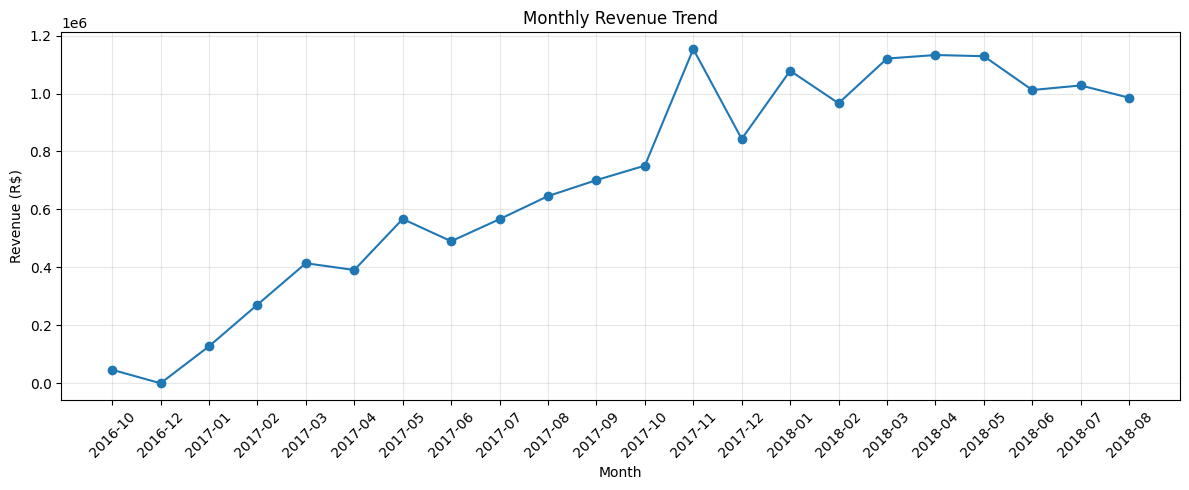

In [ ]:
#monthly revenue

query4 = """
SELECT
    order_month,
    COUNT(*) as num_orders,
    ROUND(SUM(total_payment), 2) as monthly_revenue,
    ROUND(AVG(total_payment), 2) as avg_order_value
FROM orders
GROUP BY order_month
ORDER BY order_month
"""

result4 = pd.read_sql(query4, conn)
print(result4.to_string(index=False))

#simple visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(result4['order_month'].astype(str), result4['monthly_revenue'], marker='o')
plt.xlabel('Month')
plt.ylabel('Revenue (R$)')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
#installment usage

query5 = """
SELECT
    max_installments,
    COUNT(*) as num_orders,
    ROUND(AVG(total_payment), 2) as avg_order_value,
    ROUND(SUM(total_payment), 2) as total_revenue
FROM orders
GROUP BY max_installments
ORDER BY max_installments
"""

result5 = pd.read_sql(query5, conn)
print(result5.to_string(index=False))

#ercentage using installments
total_orders = result5['num_orders'].sum()
with_installments = result5[result5['max_installments'] > 1]['num_orders'].sum()
pct_installments = (with_installments / total_orders * 100)

print(f"\n{pct_installments:.1f}% of orders use installment payments")

 max_installments  num_orders  avg_order_value  total_revenue
              0.0           2            94.32         188.63
              1.0       46814           120.21     5627476.69
              2.0       12026           128.38     1543943.92
              3.0       10133           143.75     1456604.42
              4.0        6864           164.72     1130643.59
              5.0        5083           183.75      933976.24
              6.0        3792           210.31      797487.65
              7.0        1559           187.64      292537.93
              8.0        4120           308.28     1270094.97
              9.0         618           198.78      122847.56
             10.0        5137           414.20     2127726.91
             11.0          22           125.60        2763.14
             12.0         128           325.84       41706.98
             13.0          15           151.83        2277.40
             14.0          14           178.30        2496.26
        

In [ ]:
#top 20 customers by spending

query6 = """
SELECT
    customer_id,
    COUNT(*) as num_orders,
    ROUND(SUM(total_payment), 2) as total_spent,
    ROUND(AVG(total_payment), 2) as avg_order_value
FROM orders
GROUP BY customer_id
ORDER BY total_spent DESC
LIMIT 20
"""

result6 = pd.read_sql(query6, conn)
print(result6.to_string(index=False))

                     customer_id  num_orders  total_spent  avg_order_value
1617b1357756262bfa56ab541c47bc16           1     13664.08         13664.08
ec5b2ba62e574342386871631fafd3fc           1      7274.88          7274.88
c6e2731c5b391845f6800c97401a43a9           1      6929.31          6929.31
f48d464a0baaea338cb25f816991ab1f           1      6922.21          6922.21
3fd6777bbce08a352fddd04e4a7cc8f6           1      6726.66          6726.66
05455dfa7cd02f13d132aa7a6a9729c6           1      6081.54          6081.54
df55c14d1476a9a3467f131269c2477f           1      4950.34          4950.34
24bbf5fd2f2e1b359ee7de94defc4a15           1      4764.34          4764.34
3d979689f636322c62418b6346b1c6d2           1      4681.78          4681.78
1afc82cd60e303ef09b4ef9837c9505c           1      4513.32          4513.32
cc803a2c412833101651d3f90ca7de24           1      4445.50          4445.50
926b6a6fb8b6081e00b335edaf578d35           1      4194.76          4194.76
35a413c7ca3c69756cb75867d

In [ ]:
#order value distribution

query7 = """
SELECT
    CASE
        WHEN total_payment < 50 THEN '< R$50'
        WHEN total_payment < 100 THEN 'R$50-100'
        WHEN total_payment < 200 THEN 'R$100-200'
        WHEN total_payment < 500 THEN 'R$200-500'
        ELSE 'R$500+'
    END as price_range,
    COUNT(*) as num_orders,
    ROUND(SUM(total_payment), 2) as total_revenue
FROM orders
GROUP BY price_range
ORDER BY
    CASE
        WHEN total_payment < 50 THEN 1
        WHEN total_payment < 100 THEN 2
        WHEN total_payment < 200 THEN 3
        WHEN total_payment < 500 THEN 4
        ELSE 5
    END
"""

result7 = pd.read_sql(query7, conn)
print(result7.to_string(index=False))

price_range  num_orders  total_revenue
     < R$50       16451      606653.04
   R$50-100       29466     2159145.09
  R$100-200       31018     4403742.50
  R$200-500       15466     4483233.00
     R$500+        4076     3769688.14


In [ ]:
#yearly comparison

query8 = """
SELECT
    order_year,
    COUNT(*) as num_orders,
    ROUND(SUM(total_payment), 2) as total_revenue,
    ROUND(AVG(total_payment), 2) as avg_order_value
FROM orders
GROUP BY order_year
ORDER BY order_year
"""

result8 = pd.read_sql(query8, conn)
print(result8.to_string(index=False))

 order_year  num_orders  total_revenue  avg_order_value
       2016         266       46586.33           175.14
       2017       43428     6922900.24           159.41
       2018       52783     8452975.20           160.15


In [ ]:
#key findings of sql eda

#key metrics
total_orders = pd.read_sql("SELECT COUNT(*) as n FROM orders", conn)['n'][0]
total_revenue = pd.read_sql("SELECT SUM(total_payment) as n FROM orders", conn)['n'][0]
avg_order = pd.read_sql("SELECT AVG(total_payment) as n FROM orders", conn)['n'][0]

#top payment method
top_payment = pd.read_sql("""
    SELECT payment_method, COUNT(*) as n
    FROM orders
    GROUP BY payment_method
    ORDER BY n DESC
    LIMIT 1
""", conn)

#installment usage
installment_pct = pd.read_sql("""
    SELECT
        100.0 * SUM(CASE WHEN max_installments > 1 THEN 1 ELSE 0 END) / COUNT(*) as pct
    FROM orders
""", conn)['pct'][0]

print(f"Total orders analyzed: {total_orders:,}")
print(f"Total revenue: R$ {total_revenue:,.2f}")
print(f"Average order value: R$ {avg_order:.2f}")
print(f"Most popular method: {top_payment['payment_method'][0]}")
print(f"Orders using installments: {installment_pct:.1f}%")

Total orders analyzed: 96,477
Total revenue: R$ 15,422,461.77
Average order value: R$ 159.86
Most popular method: credit_card
Orders using installments: 51.5%


Simple linear regression - relationship between installments and order value

In [ ]:
#creating the data variable
data = master_clean.copy()

In [ ]:
#do orders with more installments have higher values?

#two variables for comparison
installments = data['max_installments']
order_value = data['total_payment']

#correlation
correlation = installments.corr(order_value)

print(f"\nCorrelation between installments and order value: {correlation:.3f}")
print()

if correlation > 0.7:
    print("Strong positive relationship!")
    print("More installments = Higher order value")
elif correlation > 0.4:
    print("Moderate positive relationship")
    print("Some connection between installments and value")
elif correlation > 0:
    print("Weak positive relationship")
    print("Slight connection, but not very strong")
else:
    print("Negative or no relationship")


Correlation between installments and order value: 0.320

Weak positive relationship
Slight connection, but not very strong


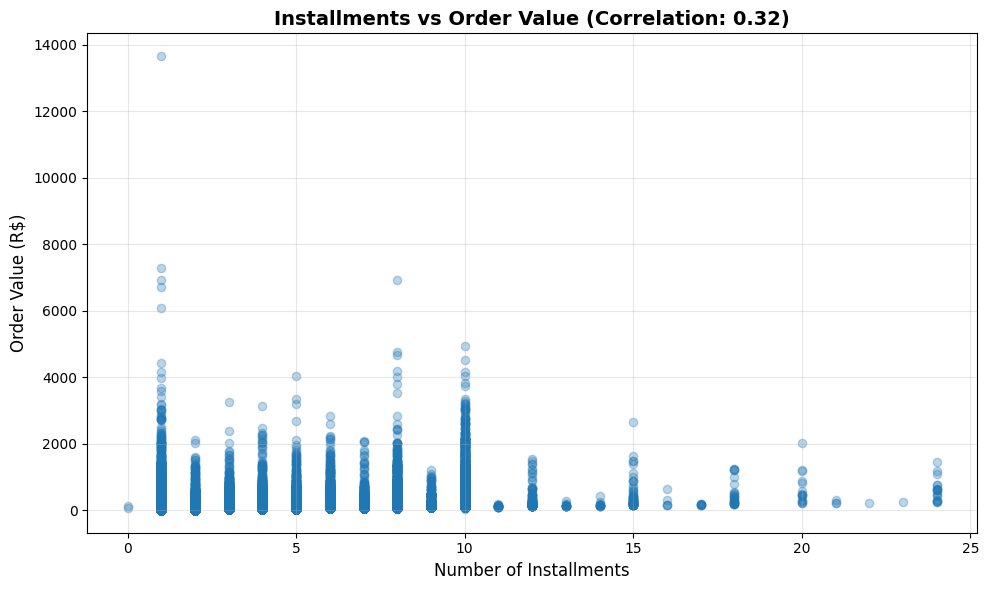

In [ ]:
#scatter plot to see the relationship

plt.figure(figsize=(10, 6))
plt.scatter(installments, order_value, alpha=0.3)
plt.xlabel('Number of Installments', fontsize=12)
plt.ylabel('Order Value (R$)', fontsize=12)
plt.title(f'Installments vs Order Value (Correlation: {correlation:.2f})',
          fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

#preparing data for the model
X = installments.values.reshape(-1, 1)
y = order_value.values

#creatinging and train the model
model = LinearRegression()
model.fit(X, y)

#linear regression results
print(f"For each additional installment:")
print(f"Order value increases by: R$ {model.coef_[0]:.2f}")
print()
print(f"Base order value (with 1 installment):")
print(f"Starting point: R$ {model.intercept_:.2f}")

For each additional installment:
Order value increases by: R$ 25.83

Base order value (with 1 installment):
Starting point: R$ 84.22


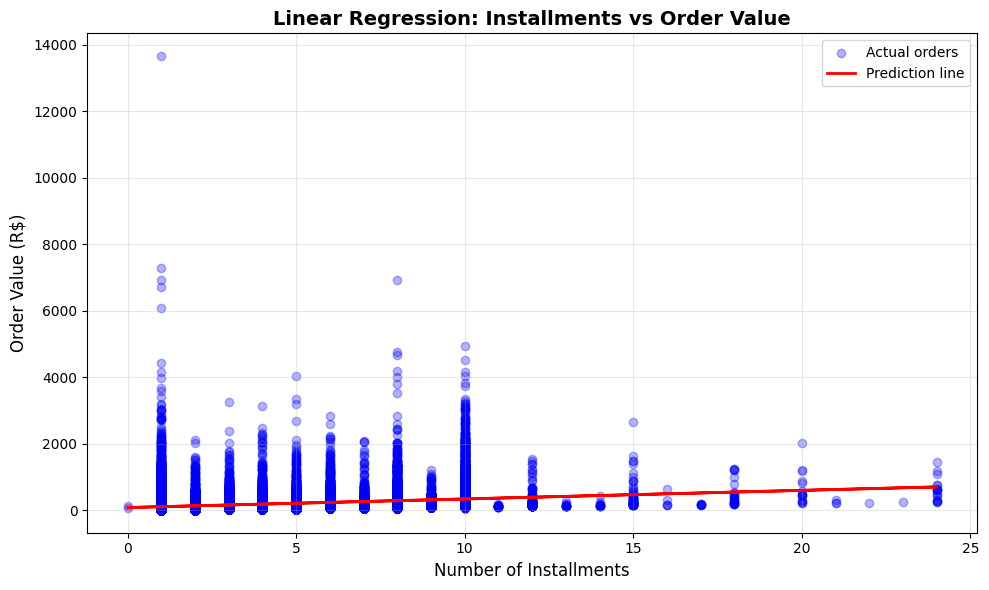

In [ ]:
#regression line
predictions = model.predict(X)

plt.figure(figsize=(10, 6))

#scatter plot of actual data
plt.scatter(X, y, alpha=0.3, label='Actual orders', color='blue')

#regression line
plt.plot(X, predictions, color='red', linewidth=2, label='Prediction line')

plt.xlabel('Number of Installments', fontsize=12)
plt.ylabel('Order Value (R$)', fontsize=12)
plt.title('Linear Regression: Installments vs Order Value',
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
#the expected order value for 5 installments

test_installments = [[5]]
predicted_value = model.predict(test_installments)

print(f"If a customer uses 5 installments:")
print(f"Expected order value: R$ {predicted_value[0]:.2f}")
print()

#a few more
for num in [1, 3, 6, 10]:
    pred = model.predict([[num]])
    print(f"{num} installment(s): R$ {pred[0]:.2f}")

If a customer uses 5 installments:
Expected order value: R$ 213.38

1 installment(s): R$ 110.05
3 installment(s): R$ 161.72
6 installment(s): R$ 239.22
10 installment(s): R$ 342.55


In [ ]:
#model quality

from sklearn.metrics import r2_score

r2 = r2_score(y, predictions)
print(f"R² Score: {r2:.3f}")
print()

if r2 > 0.7:
    print("Good model! Explains {:.0f}% of the variation".format(r2*100))
elif r2 > 0.3:
    print("Moderate model. Explains {:.0f}% of the variation".format(r2*100))
else:
    print("Weak model. Only explains {:.0f}% of the variation".format(r2*100))
    print("Other factors beyond installments affect order value")

print()
print("Interpretation:")
print(f"Installments explain {r2*100:.1f}% of order value variation")
print(f"Other {100-r2*100:.1f}% comes from different factors")

R² Score: 0.103

Weak model. Only explains 10% of the variation
Other factors beyond installments affect order value

Interpretation:
Installments explain 10.3% of order value variation
Other 89.7% comes from different factors


In [ ]:
#summary

print(f"CORRELATION: {correlation:.3f}")
print(f"R² SCORE: {r2:.3f}")
print()
print("FINDINGS:")
print(f"For each additional installment, order value increases by R$ {model.coef_[0]:.2f}")
print(f"The model explains {r2*100:.1f}% of price variation")
print(f"Correlation of {correlation:.2f} shows a {
    'strong' if correlation > 0.7 else
    'moderate' if correlation > 0.4 else 'weak'
} relationship")
print()
print("BUSINESS INSIGHT:")
if correlation > 0.4:
    print("Customers buying more expensive items use more installments")
    print("Offering installments may help sell higher-value products")
else:
    print("Installments don't strongly predict order value")
    print("Other factors drive purchase amounts more than payment method")

CORRELATION: 0.320
R² SCORE: 0.103

FINDINGS:
For each additional installment, order value increases by R$ 25.83
The model explains 10.3% of price variation
Correlation of 0.32 shows a weak relationship

BUSINESS INSIGHT:
Installments don't strongly predict order value
Other factors drive purchase amounts more than payment method


Main Analysis - Advanced SQL Queries

In [ ]:
#which customers are most valuable

clv_query = """
SELECT
    customer_id,
    customer_state,
    COUNT(DISTINCT order_id) as num_orders,
    ROUND(SUM(total_payment), 2) as total_spent,
    ROUND(AVG(total_payment), 2) as avg_order_value,
    MIN(order_purchase_timestamp) as first_order,
    MAX(order_purchase_timestamp) as last_order,
    -- customer lifespan in days
    JULIANDAY(MAX(order_purchase_timestamp)) - JULIANDAY(MIN(order_purchase_timestamp)) as lifespan_days
FROM orders
GROUP BY customer_id, customer_state
ORDER BY total_spent DESC
LIMIT 20
"""

clv_results = pd.read_sql(clv_query, conn)
print(clv_results.to_string(index=False))

#summary stats
print("Statistics")

avg_clv = pd.read_sql("SELECT AVG(total) as avg FROM (SELECT SUM(total_payment) as total FROM orders GROUP BY customer_id)", conn)
print()
print(f"Average customer lifetime value: R$ {avg_clv['avg'][0]:.2f}")
print()
top_20_pct = pd.read_sql("""
SELECT
    ROUND(100.0 * SUM(total_payment) / (SELECT SUM(total_payment) FROM orders), 2) as pct
FROM (
    SELECT customer_id, SUM(total_payment) as total_payment
    FROM orders
    GROUP BY customer_id
    ORDER BY total_payment DESC
    LIMIT 100
)
""", conn)

print(f"Top 100 customers contribute: {top_20_pct['pct'][0]}% of total revenue")

                     customer_id customer_state  num_orders  total_spent  avg_order_value         first_order          last_order  lifespan_days
1617b1357756262bfa56ab541c47bc16             RJ           1     13664.08         13664.08 2017-09-29 15:24:52 2017-09-29 15:24:52            0.0
ec5b2ba62e574342386871631fafd3fc             ES           1      7274.88          7274.88 2018-07-15 14:49:44 2018-07-15 14:49:44            0.0
c6e2731c5b391845f6800c97401a43a9             MS           1      6929.31          6929.31 2017-02-12 20:37:36 2017-02-12 20:37:36            0.0
f48d464a0baaea338cb25f816991ab1f             ES           1      6922.21          6922.21 2018-07-25 18:10:17 2018-07-25 18:10:17            0.0
3fd6777bbce08a352fddd04e4a7cc8f6             SP           1      6726.66          6726.66 2017-05-24 18:14:34 2017-05-24 18:14:34            0.0
05455dfa7cd02f13d132aa7a6a9729c6             MG           1      6081.54          6081.54 2017-11-24 11:03:35 2017-11-24 11:03:35 

In [ ]:
# RFM: Recency, Frequency, Monetary
# This segments customers by behavior

rfm_query = """
WITH customer_rfm AS (
    SELECT
        customer_id,
        -- Recency: days since last order (from the dataset's last date, not a fixed date)
        JULIANDAY((SELECT MAX(order_purchase_timestamp) FROM orders)) - JULIANDAY(MAX(order_purchase_timestamp)) as recency_days,
        -- Frequency: number of orders
        COUNT(order_id) as frequency,
        -- Monetary: total spent
        SUM(total_payment) as monetary
    FROM orders
    GROUP BY customer_id
),
rfm_scores AS (
    SELECT
        customer_id,
        recency_days,
        frequency,
        monetary,
        -- Assign scores 1-5 (5 is best)
        -- For recency: lower days = better = higher score
        CASE
            WHEN recency_days <= 30 THEN 5
            WHEN recency_days <= 60 THEN 4
            WHEN recency_days <= 90 THEN 3
            WHEN recency_days <= 180 THEN 2
            ELSE 1
        END as r_score,
        -- For frequency: more orders = better
        CASE
            WHEN frequency >= 5 THEN 5
            WHEN frequency >= 4 THEN 4
            WHEN frequency >= 3 THEN 3
            WHEN frequency >= 2 THEN 2
            ELSE 1
        END as f_score,
        -- For monetary: higher spend = better
        CASE
            WHEN monetary >= 1000 THEN 5
            WHEN monetary >= 500 THEN 4
            WHEN monetary >= 200 THEN 3
            WHEN monetary >= 100 THEN 2
            ELSE 1
        END as m_score
    FROM customer_rfm
)
SELECT
    -- Create customer segments
    CASE
        WHEN r_score >= 4 AND f_score >= 4 AND m_score >= 4 THEN 'Champions'
        WHEN r_score >= 3 AND f_score >= 3 AND m_score >= 3 THEN 'Loyal Customers'
        WHEN r_score >= 4 AND m_score >= 3 THEN 'Recent High-Value'
        WHEN r_score >= 4 THEN 'Recent Customers'
        WHEN r_score <= 2 AND f_score >= 3 THEN 'At Risk'
        WHEN r_score <= 2 AND m_score >= 3 THEN 'Lost High-Value'
        WHEN r_score <= 2 THEN 'Lost Customers'
        ELSE 'Regular Customers'
    END as customer_segment,
    COUNT(*) as num_customers,
    ROUND(AVG(monetary), 2) as avg_value,
    ROUND(SUM(monetary), 2) as total_value
FROM rfm_scores
GROUP BY customer_segment
ORDER BY total_value DESC
"""

rfm_results = pd.read_sql(rfm_query, conn)

print("Customer Segmentation")
print(rfm_results.to_string(index=False))

Customer Segmentation
 customer_segment  num_customers  avg_value  total_value
  Lost High-Value          15703     420.69   6606137.03
   Lost Customers          62095      92.98   5773681.66
Recent High-Value           2535     427.73   1084298.33
Regular Customers           6104     166.95   1019066.45
 Recent Customers          10040      93.55    939278.30


In [ ]:
#churn = customers who haven't ordered in 90+ days

churn_query = """
WITH customer_status AS (
    SELECT
        customer_id,
        customer_state,
        MAX(order_purchase_timestamp) as last_order_date,
        COUNT(order_id) as total_orders,
        SUM(total_payment) as lifetime_value,
        JULIANDAY('2018-12-31') - JULIANDAY(MAX(order_purchase_timestamp)) as days_since_last_order
    FROM orders
    GROUP BY customer_id, customer_state
)
SELECT
    CASE
        WHEN days_since_last_order > 180 THEN 'Churned (180+ days)'
        WHEN days_since_last_order > 90 THEN 'At Risk (90-180 days)'
        WHEN days_since_last_order > 30 THEN 'Active (30-90 days)'
        ELSE 'Highly Active (<30 days)'
    END as customer_status,
    COUNT(*) as num_customers,
    ROUND(AVG(lifetime_value), 2) as avg_lifetime_value,
    ROUND(SUM(lifetime_value), 2) as total_value_at_risk
FROM customer_status
GROUP BY customer_status
ORDER BY
    CASE
        WHEN days_since_last_order > 180 THEN 4
        WHEN days_since_last_order > 90 THEN 3
        WHEN days_since_last_order > 30 THEN 2
        ELSE 1
    END
"""

churn_results = pd.read_sql(churn_query, conn)

print("Customer Churn Analysis")
print(churn_results.to_string(index=False))

#churn rate
total_customers = pd.read_sql("SELECT COUNT(DISTINCT customer_id) as n FROM orders", conn)['n'][0]
churned = churn_results[churn_results['customer_status'].str.contains('Churned')]['num_customers'].sum()
churn_rate = (churned / total_customers * 100)

print(f"Churn Rate: {churn_rate:.1f}%")
print(f"   {churned:,} out of {total_customers:,} customers have churned")

Customer Churn Analysis
      customer_status  num_customers  avg_lifetime_value  total_value_at_risk
At Risk (90-180 days)          11944              161.13           1924482.57
  Churned (180+ days)          84533              159.68          13497979.20
Churn Rate: 87.6%
   84,533 out of 96,477 customers have churned


In [ ]:
#how do payment methods relate to customer value

payment_analysis = """
SELECT
    payment_method,
    COUNT(DISTINCT customer_id) as unique_customers,
    COUNT(order_id) as total_orders,
    ROUND(AVG(total_payment), 2) as avg_order_value,
    ROUND(SUM(total_payment), 2) as total_revenue,
    ROUND(AVG(max_installments), 2) as avg_installments,
    -- What % of orders use installments?
    ROUND(100.0 * SUM(CASE WHEN max_installments > 1 THEN 1 ELSE 0 END) / COUNT(*), 2) as pct_with_installments
FROM orders
GROUP BY payment_method
ORDER BY total_revenue DESC
"""

payment_results = pd.read_sql(payment_analysis, conn)

print("Payment Method Analysis")
print(payment_results.to_string(index=False))

#installment deep dive
installment_analysis = """
SELECT
    max_installments,
    COUNT(*) as num_orders,
    ROUND(AVG(total_payment), 2) as avg_order_value,
    ROUND(SUM(total_payment), 2) as total_revenue
FROM orders
WHERE max_installments > 1
GROUP BY max_installments
ORDER BY max_installments
"""

install_results = pd.read_sql(installment_analysis, conn)
print()
print("Installment payment patterns")
print(install_results.to_string(index=False))

Payment Method Analysis
payment_method  unique_customers  total_orders  avg_order_value  total_revenue  avg_installments  pct_with_installments
   credit_card             73104         73104           165.60    12106174.99              3.53                  67.41
        boleto             19191         19191           144.33     2769932.58              1.00                   0.00
       voucher              2698          2698           125.27      337983.08              1.48                  14.01
    debit_card              1484          1484           140.41      208371.12              1.00                   0.00

Installment payment patterns
 max_installments  num_orders  avg_order_value  total_revenue
              2.0       12026           128.38     1543943.92
              3.0       10133           143.75     1456604.42
              4.0        6864           164.72     1130643.59
              5.0        5083           183.75      933976.24
              6.0        3792       


Top 15 states by revenue

customer_state  num_customers  num_orders  avg_order_value  total_revenue  orders_per_customer
            SP          40500       40500           142.48     5770266.19                  1.0
            RJ          12350       12350           166.45     2055690.45                  1.0
            MG          11354       11354           160.23     1819277.61                  1.0
            RS           5345        5345           161.24      861802.40                  1.0
            PR           4923        4923           158.83      781919.55                  1.0
            SC           3546        3546           167.85      595208.40                  1.0
            BA           3256        3256           181.59      591270.60                  1.0
            DF           2080        2080           166.42      346146.17                  1.0
            GO           1957        1957           170.82      334294.22                  1.0
            ES         

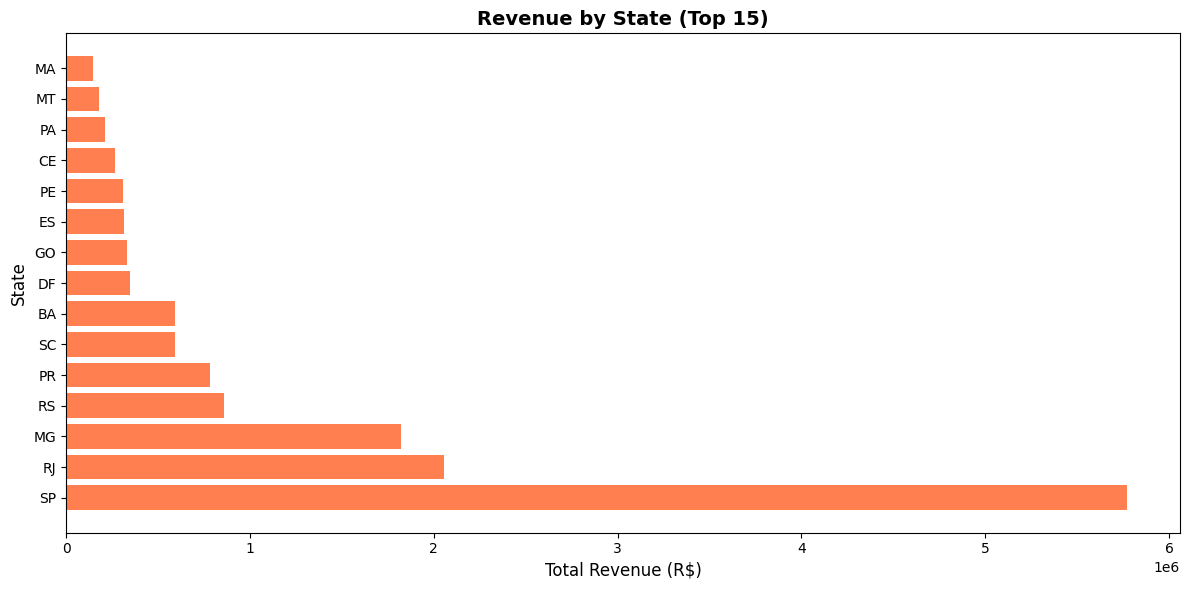

In [ ]:
#which states are most profitable?

geo_query = """
SELECT
    customer_state,
    COUNT(DISTINCT customer_id) as num_customers,
    COUNT(order_id) as num_orders,
    ROUND(AVG(total_payment), 2) as avg_order_value,
    ROUND(SUM(total_payment), 2) as total_revenue,
    -- Orders per customer
    ROUND(1.0 * COUNT(order_id) / COUNT(DISTINCT customer_id), 2) as orders_per_customer
FROM orders
GROUP BY customer_state
HAVING COUNT(order_id) >= 100
ORDER BY total_revenue DESC
LIMIT 15
"""

geo_results = pd.read_sql(geo_query, conn)

print()
print("Top 15 states by revenue")
print()
print(geo_results.to_string(index=False))

#visualization
plt.figure(figsize=(12, 6))
plt.barh(geo_results['customer_state'], geo_results['total_revenue'], color='coral')
plt.xlabel('Total Revenue (R$)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.title('Revenue by State (Top 15)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
print()
print("MKey Findings")
print()
print()

print("Customer Lifetime Value")
print(f"Top 100 customers drive {top_20_pct['pct'][0]}% of revenue")
print(f"Average CLV: R$ {avg_clv['avg'][0]:.2f}")
print()

print("RFM SEGMENTATION:")
print("Customers segmented into 6 groups")
print("Champions and Loyal customers are most valuable")
print()

print("Churn Analysis:")
print(f"{churn_rate:.1f}% churn rate")
print(f"{churned:,} customers haven't ordered in 180+ days")
print()

print("Payment Insights")
top_payment_method = payment_results.iloc[0]
print(f"{top_payment_method['payment_method']} is most popular")
print(f"Generates R$ {top_payment_method['total_revenue']:,.2f} in revenue")
installment_usage = pd.read_sql("""
    SELECT 100.0 * SUM(CASE WHEN max_installments > 1 THEN 1 ELSE 0 END) / COUNT(*) as pct
    FROM orders
""", conn)['pct'][0]
print(f"{installment_usage:.1f}% of orders use installment payments")
print()

print("Geographic Insights")
top_state = geo_results.iloc[0]
print(f"{top_state['customer_state']} is top state")
print(f"{top_state['num_customers']:,} customers, R$ {top_state['total_revenue']:,.2f} revenue")
print()


MKey Findings


Customer Lifetime Value
Top 100 customers drive 2.16% of revenue
Average CLV: R$ 159.86

RFM SEGMENTATION:
Customers segmented into 6 groups
Champions and Loyal customers are most valuable

Churn Analysis:
87.6% churn rate
84,533 customers haven't ordered in 180+ days

Payment Insights
credit_card is most popular
Generates R$ 12,106,174.99 in revenue
51.5% of orders use installment payments

Geographic Insights
SP is top state
40,500 customers, R$ 5,770,266.19 revenue



Logistic Regression - Installment Payment Prediction


In [ ]:
#Can we predict if a customer will use installments?

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#binary outcome: 1 = uses installments, 0 = doesn't

#target variable
data['uses_installments'] = (data['max_installments'] > 1).astype(int)

print("target variable distribution")
print(data['uses_installments'].value_counts())
print()
print(f"Percentage using installments: {data['uses_installments'].mean()*100:.1f}%")

target variable distribution
uses_installments
1    49661
0    46816
Name: count, dtype: int64

Percentage using installments: 51.5%


In [ ]:
#target
model_data = data.copy()
model_data['uses_installments'] = (model_data['max_installments'] > 1).astype(int)

#ONLY clearly numeric features
X = model_data[['total_payment']].copy()  # Just order value
y = model_data['uses_installments'].copy()

# Removing missing values
mask = ~(X.isnull().any(axis=1) | y.isnull())
X = X[mask]
y = y[mask]

print(f"Using simple model with just order value")
print(f"Data: {len(X):,} orders")
print(f"X shape: {X.shape}")
print(f"X data type: {X.dtypes}")

#split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#training model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

#evaluating
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2%}")

Using simple model with just order value
Data: 96,477 orders
X shape: (96477, 1)
X data type: total_payment    float64
dtype: object
Accuracy: 62.71%


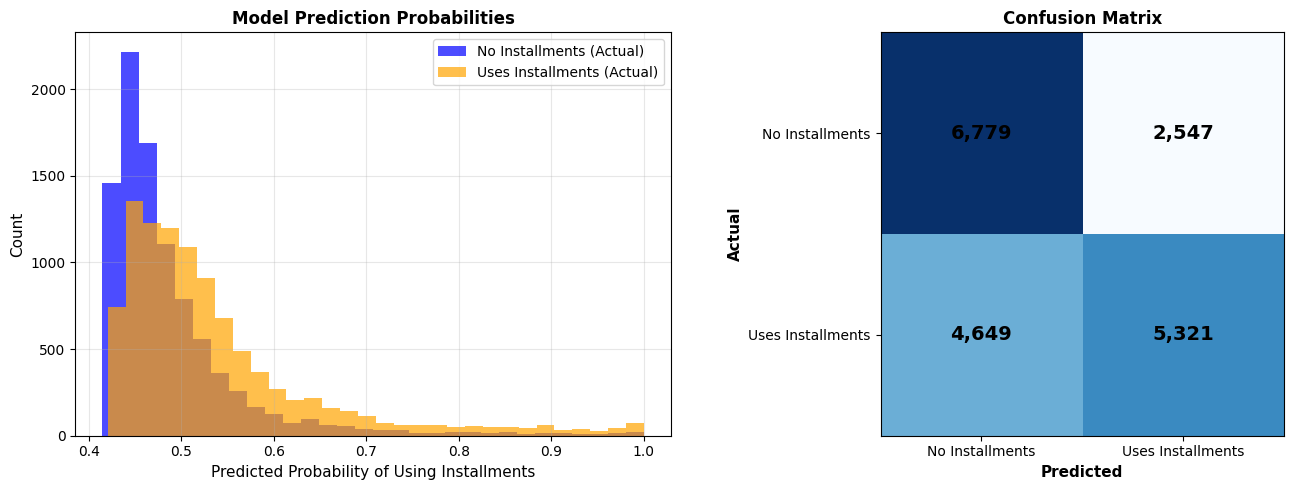

Interpretation:
Blue bars overlapping = Model struggles to separate classes
Clear separation = Model predicts well


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#predictions and probabilities
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

#visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#probability
ax1 = axes[0]
ax1.hist(y_pred_proba[y_test == 0], bins=30, alpha=0.7, label='No Installments (Actual)', color='blue')
ax1.hist(y_pred_proba[y_test == 1], bins=30, alpha=0.7, label='Uses Installments (Actual)', color='orange')
ax1.set_xlabel('Predicted Probability of Using Installments', fontsize=11)
ax1.set_ylabel('Count', fontsize=11)
ax1.set_title('Model Prediction Probabilities', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

#confusion matrix
ax2 = axes[1]
cm = confusion_matrix(y_test, y_pred)

im = ax2.imshow(cm, cmap='Blues')
ax2.set_xticks([0, 1])
ax2.set_yticks([0, 1])
ax2.set_xticklabels(['No Installments', 'Uses Installments'])
ax2.set_yticklabels(['No Installments', 'Uses Installments'])
ax2.set_xlabel('Predicted', fontsize=11, fontweight='bold')
ax2.set_ylabel('Actual', fontsize=11, fontweight='bold')
ax2.set_title('Confusion Matrix', fontsize=12, fontweight='bold')

#adding numbers to confusion matrix
for i in range(2):
    for j in range(2):
        text = ax2.text(j, i, f'{cm[i, j]:,}',
                       ha="center", va="center", color="black", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("Interpretation:")
print(f"Blue bars overlapping = Model struggles to separate classes")
print(f"Clear separation = Model predicts well")

In [ ]:
#example predictions
print()
print("Example Predictions")
print()

#first 10 test examples
examples = pd.DataFrame({
    'Order Value (R$)': X_test['total_payment'].values[:10],
    'Actual': ['Yes' if x == 1 else 'No' for x in y_test.values[:10]],
    'Predicted': ['Yes' if x == 1 else 'No' for x in y_pred[:10]],
    'Probability': [f'{x:.1%}' for x in y_pred_proba[:10]]
})

print(examples.to_string(index=False))
print()

#prediction for a specific order value
print()
print("New Order Prediction")
print()

test_values = [50, 100, 200, 500, 1000]
print("Order Value | Probability | Prediction")
print()

for value in test_values:
    prob = model.predict_proba([[value]])[0, 1]
    pred = "Yes" if prob > 0.5 else "No"
    print(f"R$ {value:>7.2f}  | {prob:>10.1%}  | {pred}")

print()
print("Higher order values → Higher probability of installments")


Example Predictions

 Order Value (R$) Actual Predicted Probability
            80.33     No        No       46.5%
            45.61    Yes        No       43.9%
           154.73     No       Yes       52.1%
            64.11     No        No       45.3%
           289.31     No       Yes       61.9%
            44.00     No        No       43.8%
           111.91    Yes        No       48.9%
            49.10     No        No       44.2%
            84.93     No        No       46.8%
           157.60    Yes       Yes       52.3%


New Order Prediction

Order Value | Probability | Prediction

R$   50.00  |      44.3%  | No
R$  100.00  |      48.0%  | No
R$  200.00  |      55.4%  | Yes
R$  500.00  |      75.3%  | Yes
R$ 1000.00  |      93.2%  | Yes

Higher order values → Higher probability of installments


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#what the model learned
print()
print("What the model learned")
print()

coefficient = model.coef_[0][0]
intercept = model.intercept_[0]

print(f"Coefficient (order_value): {coefficient:.6f}")
print(f"Intercept: {intercept:.4f}")
print()

if coefficient > 0:
    print("Positive coefficient means:")
    print("Higher order values → MORE likely to use installments")
    print()
    print(f"For every R$100 increase in order value:")
    print(f"Probability of installments increases by ~{abs(coefficient * 100):.2f} log-odds")
else:
    print("Negative coefficient means:")
    print("Higher order values → LESS likely to use installments")


What the model learned

Coefficient (order_value): 0.002992
Intercept: -0.3803

Positive coefficient means:
Higher order values → MORE likely to use installments

For every R$100 increase in order value:
Probability of installments increases by ~0.30 log-odds


In [ ]:
print()
print("Logistic regression - summary ")
print()

#key metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Model performance")
print(f"Accuracy: {accuracy:.1%} (correct predictions)")
print(f"Precision: {precision:.1%} (when we predict 'Yes', how often correct)")
print(f"Recall: {recall:.1%} (of all 'Yes' cases, how many we caught)")
print()

print("Business question:")
print("Can we predict if customers will use installment payments?")
print()

print("Answer:")
if accuracy > 0.7:
    print(f"YES - Model achieves {accuracy:.1%} accuracy")
    print("Order value is a strong predictor")
else:
    print(f"MODERATE - Model achieves {accuracy:.1%} accuracy")
    print("Order value has some predictive power but isn't perfect")
print()

print("Key findings:")
print(f"Customers with higher order values are MORE likely to use installments")
print(f"This suggests installments enable larger purchases")
print()

print("Business application:")
print("Target high-value products with installment promotions")
print("Show installment option prominently for orders >R$200")
print("Predict payment processing needs based on order value")
print("Optimize checkout flow based on predicted payment method")
print()

print("Limitations:")
print("Simple model (only uses order value)")
print("Could improve with more features (customer history, product type)")
print("Doesn't account for seasonal patterns")
print()


Logistic regression - summary 

Model performance
Accuracy: 62.7% (correct predictions)
Precision: 67.6% (when we predict 'Yes', how often correct)
Recall: 53.4% (of all 'Yes' cases, how many we caught)

Business question:
Can we predict if customers will use installment payments?

Answer:
MODERATE - Model achieves 62.7% accuracy
Order value has some predictive power but isn't perfect

Key findings:
Customers with higher order values are MORE likely to use installments
This suggests installments enable larger purchases

Business application:
Target high-value products with installment promotions
Show installment option prominently for orders >R$200
Predict payment processing needs based on order value
Optimize checkout flow based on predicted payment method

Limitations:
Simple model (only uses order value)
Could improve with more features (customer history, product type)
Doesn't account for seasonal patterns



Visualizations

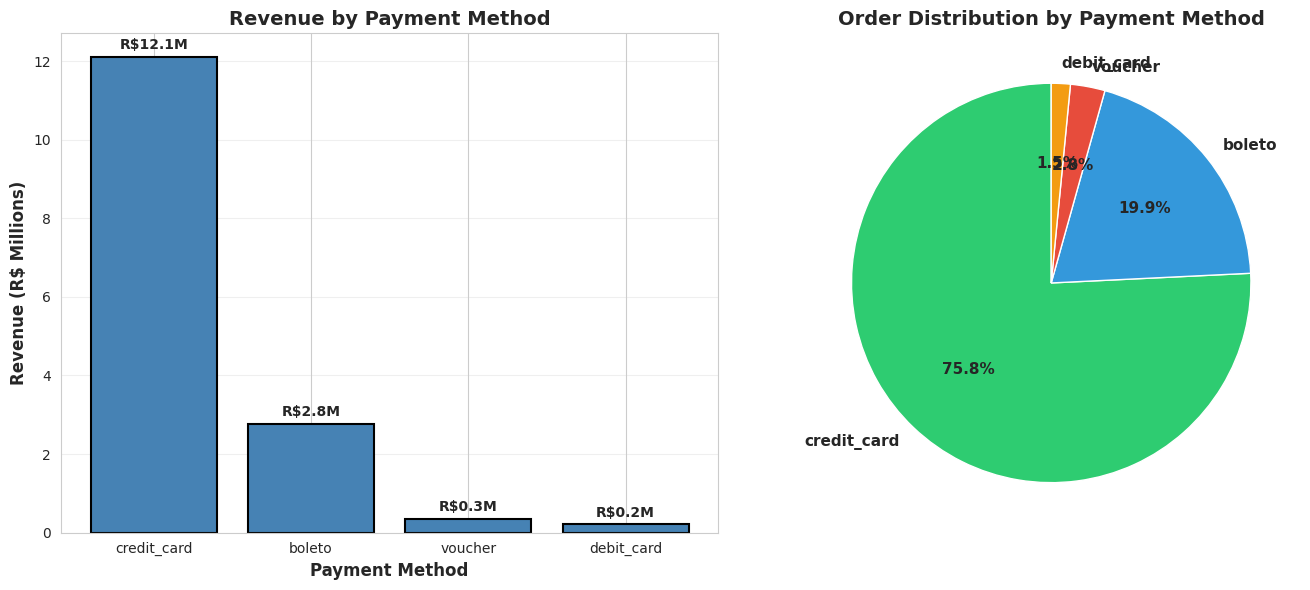

In [ ]:
import seaborn as sns

#style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

#data
payment_revenue = pd.read_sql("""
    SELECT
        payment_method,
        COUNT(*) as num_orders,
        ROUND(SUM(total_payment), 2) as total_revenue
    FROM orders
    GROUP BY payment_method
    ORDER BY total_revenue DESC
""", conn)

#figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#revenue by payment method
ax1 = axes[0]
ax1.bar(payment_revenue['payment_method'],
        payment_revenue['total_revenue']/1000000,
        color='steelblue', edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Payment Method', fontsize=12, fontweight='bold')
ax1.set_ylabel('Revenue (R$ Millions)', fontsize=12, fontweight='bold')
ax1.set_title('Revenue by Payment Method', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

#value labels
for i, (method, revenue) in enumerate(zip(payment_revenue['payment_method'],
                                           payment_revenue['total_revenue'])):
    ax1.text(i, revenue/1000000 + 0.2, f'R${revenue/1000000:.1f}M',
            ha='center', fontweight='bold', fontsize=10)

#order count by payment method
ax2 = axes[1]
colors = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12']
ax2.pie(payment_revenue['num_orders'],
        labels=payment_revenue['payment_method'],
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        textprops={'fontsize': 11, 'fontweight': 'bold'})
ax2.set_title('Order Distribution by Payment Method', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

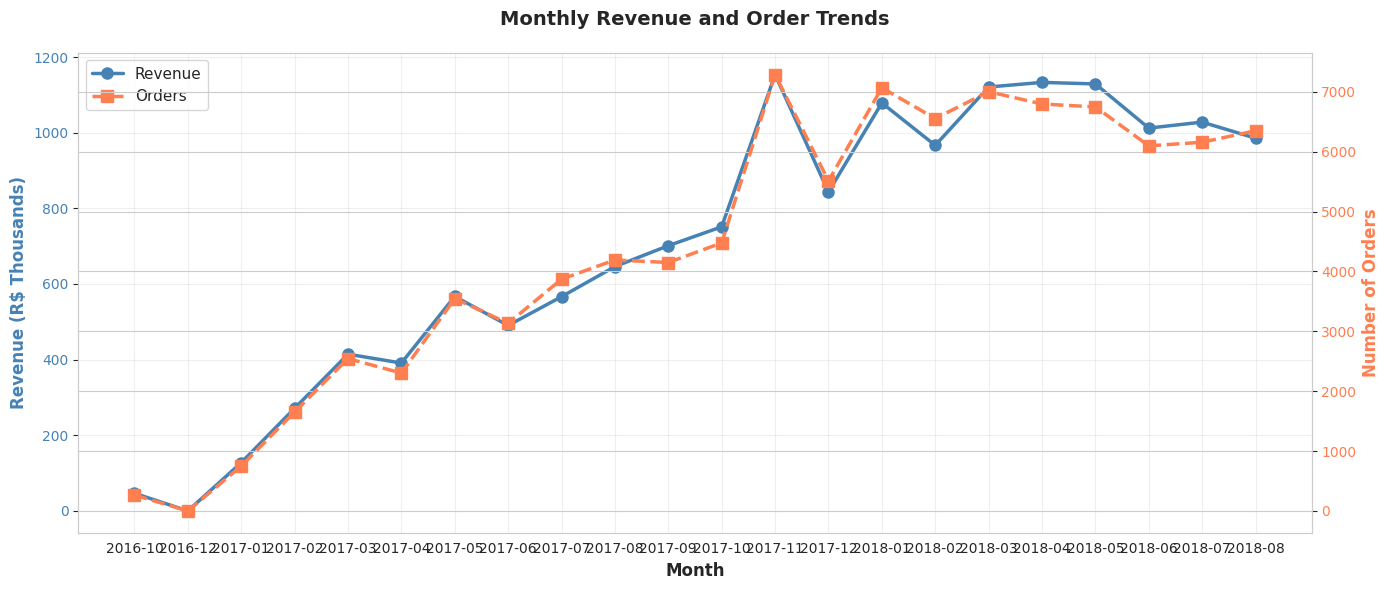

Peak month: 2017-11
Peak revenue: R$ 1,153,528.05


In [ ]:
#monthly data
monthly_data = pd.read_sql("""
    SELECT
        order_month,
        COUNT(*) as num_orders,
        ROUND(SUM(total_payment), 2) as revenue
    FROM orders
    GROUP BY order_month
    ORDER BY order_month
""", conn)

#visualization
fig, ax1 = plt.subplots(figsize=(14, 6))

#revenue line
color = 'steelblue'
ax1.plot(monthly_data['order_month'].astype(str),
         monthly_data['revenue']/1000,
         color=color, marker='o', linewidth=2.5, markersize=8, label='Revenue')
ax1.set_xlabel('Month', fontsize=12, fontweight='bold')
ax1.set_ylabel('Revenue (R$ Thousands)', fontsize=12, fontweight='bold', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(alpha=0.3)

#orders line (secondary axis)
ax2 = ax1.twinx()
color = 'coral'
ax2.plot(monthly_data['order_month'].astype(str),
         monthly_data['num_orders'],
         color=color, marker='s', linewidth=2.5, markersize=8,
         linestyle='--', label='Orders')
ax2.set_ylabel('Number of Orders', fontsize=12, fontweight='bold', color=color)
ax2.tick_params(axis='y', labelcolor=color)

#title and formatting
plt.title('Monthly Revenue and Order Trends', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')

#legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=11)

plt.tight_layout()
plt.show()

print(f"Peak month: {monthly_data.loc[monthly_data['revenue'].idxmax(), 'order_month']}")
print(f"Peak revenue: R$ {monthly_data['revenue'].max():,.2f}")

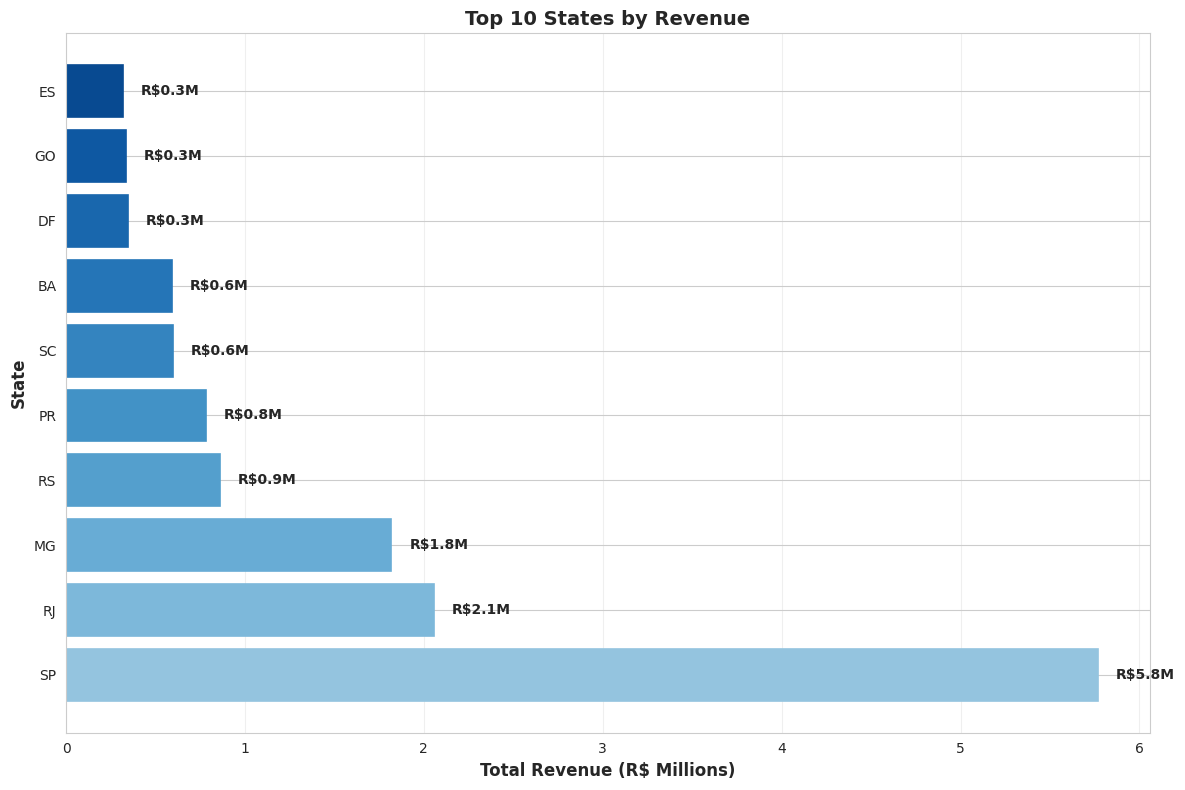

In [ ]:
# Get state data
state_data = pd.read_sql("""
    SELECT
        customer_state,
        COUNT(DISTINCT customer_id) as num_customers,
        COUNT(*) as num_orders,
        ROUND(SUM(total_payment), 2) as total_revenue
    FROM orders
    GROUP BY customer_state
    ORDER BY total_revenue DESC
    LIMIT 10
""", conn)

#horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.barh(state_data['customer_state'],
               state_data['total_revenue']/1000000,
               color='#3498db', edgecolor='black', linewidth=1.2)

#colors
colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(state_data)))
for bar, color in zip(bars, colors):
    bar.set_color(color)

ax.set_xlabel('Total Revenue (R$ Millions)', fontsize=12, fontweight='bold')
ax.set_ylabel('State', fontsize=12, fontweight='bold')
ax.set_title('Top 10 States by Revenue', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

#value labels
for i, (state, revenue) in enumerate(zip(state_data['customer_state'],
                                          state_data['total_revenue'])):
    ax.text(revenue/1000000 + 0.1, i, f'R${revenue/1000000:.1f}M',
           va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

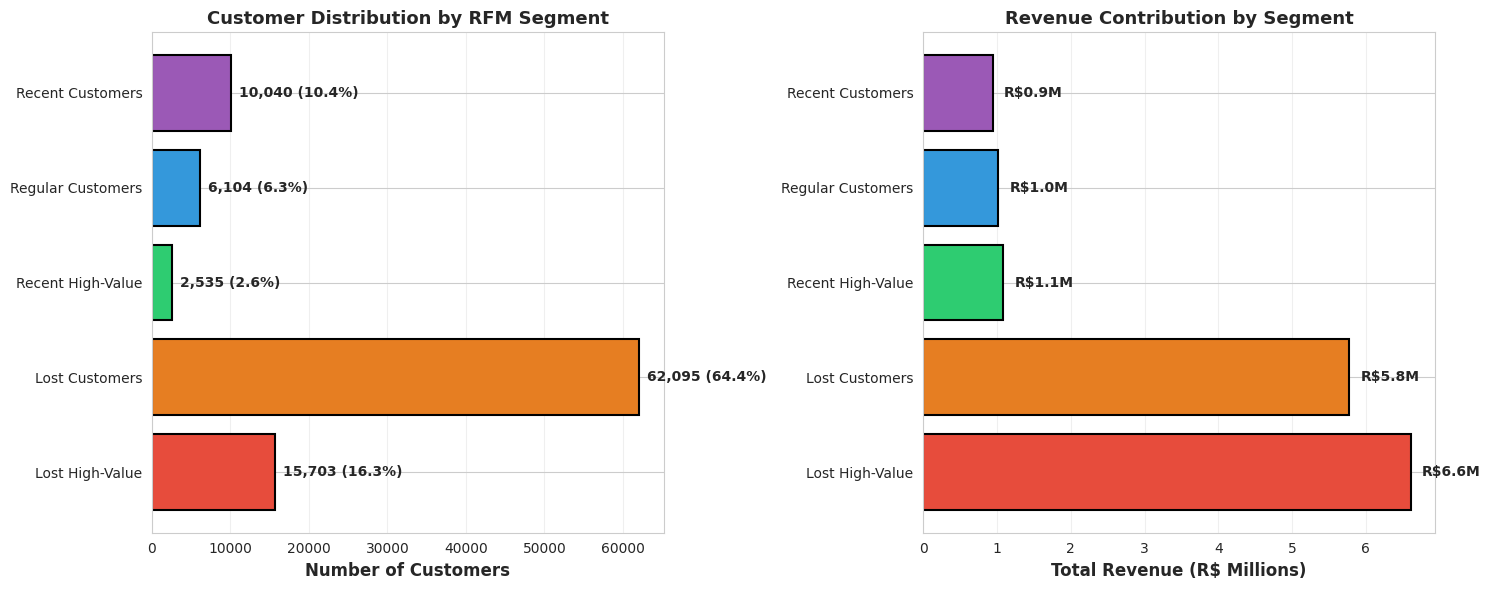


KEY INSIGHT:
Lost customers represent 77,798 customers
That's 80.6% of the customer base!


In [ ]:
#RFM visualization

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#customer count
ax1 = axes[0]
colors_rfm = ['#e74c3c', '#e67e22', '#2ecc71', '#3498db', '#9b59b6']
bars = ax1.barh(rfm_results['customer_segment'],
                rfm_results['num_customers'],
                color=colors_rfm, edgecolor='black', linewidth=1.5)

ax1.set_xlabel('Number of Customers', fontsize=12, fontweight='bold')
ax1.set_title('Customer Distribution by RFM Segment', fontsize=13, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

#percentage labels
total = rfm_results['num_customers'].sum()
for i, (segment, count) in enumerate(zip(rfm_results['customer_segment'],
                                          rfm_results['num_customers'])):
    pct = count/total*100
    ax1.text(count + 1000, i, f'{count:,} ({pct:.1f}%)',
            va='center', fontweight='bold', fontsize=10)

#revenue contribution
ax2 = axes[1]
ax2.barh(rfm_results['customer_segment'],
         rfm_results['total_value']/1000000,
         color=colors_rfm, edgecolor='black', linewidth=1.5)

ax2.set_xlabel('Total Revenue (R$ Millions)', fontsize=12, fontweight='bold')
ax2.set_title('Revenue Contribution by Segment', fontsize=13, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

#value labels
for i, (segment, revenue) in enumerate(zip(rfm_results['customer_segment'],
                                            rfm_results['total_value'])):
    ax2.text(revenue/1000000 + 0.15, i, f'R${revenue/1000000:.1f}M',
            va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

#the churn problem
print("\nKEY INSIGHT:")
print(f"Lost customers represent {rfm_results[rfm_results['customer_segment'].str.contains('Lost')]['num_customers'].sum():,} customers")
print(f"That's {rfm_results[rfm_results['customer_segment'].str.contains('Lost')]['num_customers'].sum()/total*100:.1f}% of the customer base!")

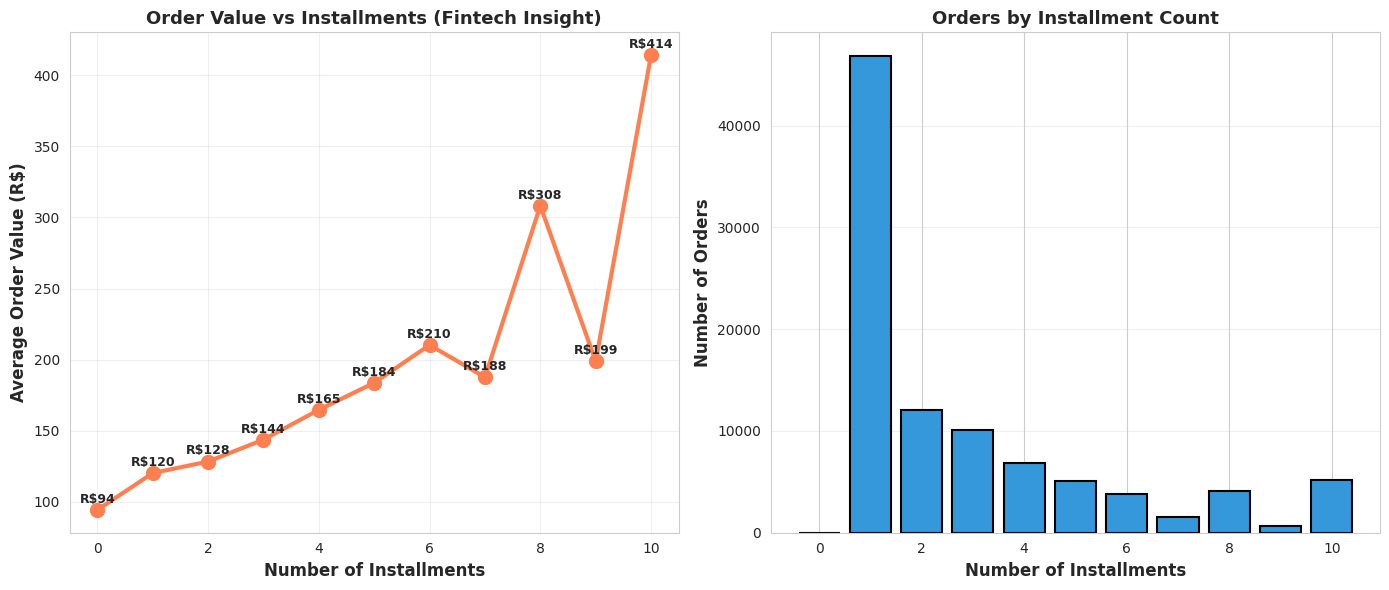


FINTECH INSIGHT:
51.5% of orders use installment payments
Higher installments correlate with higher order values


In [ ]:
#installment analysis
installment_data = pd.read_sql("""
    SELECT
        max_installments,
        COUNT(*) as num_orders,
        ROUND(AVG(total_payment), 2) as avg_order_value
    FROM orders
    WHERE max_installments <= 10
    GROUP BY max_installments
    ORDER BY max_installments
""", conn)

#visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#order count by installments
ax1 = axes[1]
ax1.bar(installment_data['max_installments'],
        installment_data['num_orders'],
        color='#3498db', edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Number of Installments', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Orders', fontsize=12, fontweight='bold')
ax1.set_title('Orders by Installment Count', fontsize=13, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

#average order value by installments
ax2 = axes[0]
ax2.plot(installment_data['max_installments'],
         installment_data['avg_order_value'],
         marker='o', color='coral', linewidth=3, markersize=10)
ax2.set_xlabel('Number of Installments', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Order Value (R$)', fontsize=12, fontweight='bold')
ax2.set_title('Order Value vs Installments (Fintech Insight)', fontsize=13, fontweight='bold')
ax2.grid(alpha=0.3)

#value labels
for x, y in zip(installment_data['max_installments'],
                installment_data['avg_order_value']):
    ax2.text(x, y + 5, f'R${y:.0f}', ha='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

#insight
with_installments = pd.read_sql("""
    SELECT
        SUM(CASE WHEN max_installments > 1 THEN 1 ELSE 0 END) * 100.0 / COUNT(*) as pct
    FROM orders
""", conn)['pct'][0]

print(f"\nFINTECH INSIGHT:")
print(f"{with_installments:.1f}% of orders use installment payments")
print(f"Higher installments correlate with higher order values")

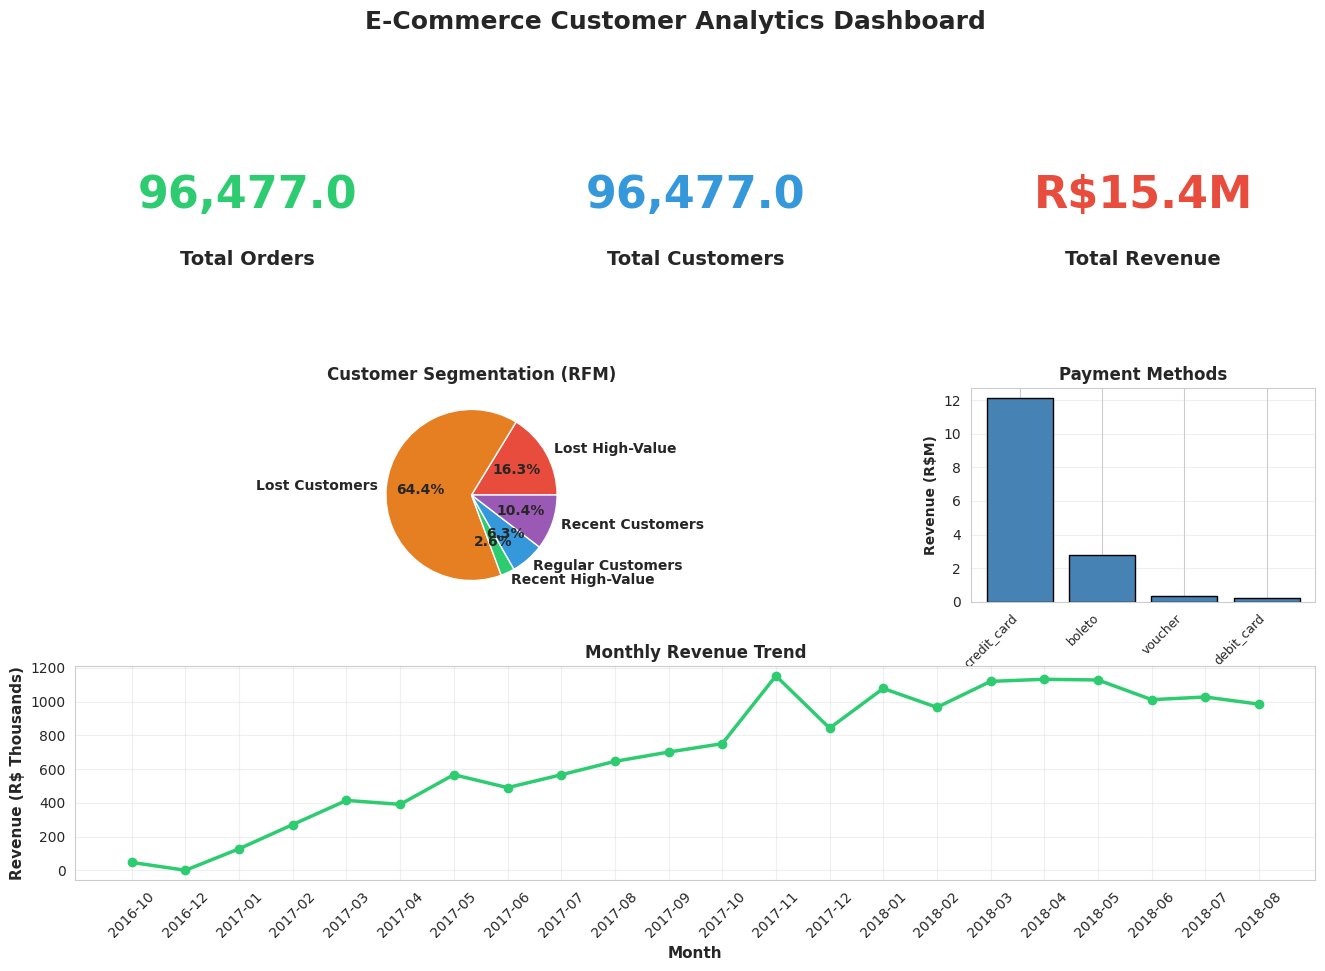

In [ ]:
#summary dashboard
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

#title
fig.suptitle('E-Commerce Customer Analytics Dashboard',
             fontsize=18, fontweight='bold', y=0.98)

#KPI Cards
kpis = pd.read_sql("""
    SELECT
        COUNT(*) as total_orders,
        COUNT(DISTINCT customer_id) as total_customers,
        ROUND(SUM(total_payment), 2) as total_revenue,
        ROUND(AVG(total_payment), 2) as avg_order_value
    FROM orders
""", conn).iloc[0]

ax1 = fig.add_subplot(gs[0, 0])
ax1.text(0.5, 0.6, f'{kpis["total_orders"]:,}',
         ha='center', va='center', fontsize=32, fontweight='bold', color='#2ecc71')
ax1.text(0.5, 0.3, 'Total Orders',
         ha='center', va='center', fontsize=14, fontweight='bold')
ax1.axis('off')
ax1.set_facecolor('#ecf0f1')

ax2 = fig.add_subplot(gs[0, 1])
ax2.text(0.5, 0.6, f'{kpis["total_customers"]:,}',
         ha='center', va='center', fontsize=32, fontweight='bold', color='#3498db')
ax2.text(0.5, 0.3, 'Total Customers',
         ha='center', va='center', fontsize=14, fontweight='bold')
ax2.axis('off')
ax2.set_facecolor('#ecf0f1')

ax3 = fig.add_subplot(gs[0, 2])
ax3.text(0.5, 0.6, f'R${kpis["total_revenue"]/1000000:.1f}M',
         ha='center', va='center', fontsize=32, fontweight='bold', color='#e74c3c')
ax3.text(0.5, 0.3, 'Total Revenue',
         ha='center', va='center', fontsize=14, fontweight='bold')
ax3.axis('off')
ax3.set_facecolor('#ecf0f1')

#RFM Pie Chart (middle left)
ax4 = fig.add_subplot(gs[1, :2])
ax4.pie(rfm_results['num_customers'],
        labels=rfm_results['customer_segment'],
        autopct='%1.1f%%',
        colors=['#e74c3c', '#e67e22', '#2ecc71', '#3498db', '#9b59b6'],
        textprops={'fontsize': 10, 'fontweight': 'bold'})
ax4.set_title('Customer Segmentation (RFM)', fontsize=12, fontweight='bold')

#payment methods
ax5 = fig.add_subplot(gs[1, 2])
payment_simple = payment_revenue.head(4)
ax5.bar(range(len(payment_simple)),
        payment_simple['total_revenue']/1000000,
        color='steelblue', edgecolor='black')
ax5.set_xticks(range(len(payment_simple)))
ax5.set_xticklabels(payment_simple['payment_method'], rotation=45, ha='right', fontsize=9)
ax5.set_ylabel('Revenue (R$M)', fontsize=10, fontweight='bold')
ax5.set_title('Payment Methods', fontsize=12, fontweight='bold')
ax5.grid(axis='y', alpha=0.3)

# 4. Monthly Trend (bottom)
ax6 = fig.add_subplot(gs[2, :])
ax6.plot(monthly_data['order_month'].astype(str),
         monthly_data['revenue']/1000,
         marker='o', linewidth=2.5, markersize=6, color='#2ecc71')
ax6.set_xlabel('Month', fontsize=11, fontweight='bold')
ax6.set_ylabel('Revenue (R$ Thousands)', fontsize=11, fontweight='bold')
ax6.set_title('Monthly Revenue Trend', fontsize=12, fontweight='bold')
ax6.grid(alpha=0.3)
ax6.tick_params(axis='x', rotation=45)

plt.show()

In [ ]:
# Get numbers for executive summary

# 1. Installment usage percentage
installment_pct = pd.read_sql("""
    SELECT
        100.0 * SUM(CASE WHEN max_installments > 1 THEN 1 ELSE 0 END) / COUNT(*) as pct
    FROM orders
""", conn)['pct'][0]

print(f"Installment usage: {installment_pct:.1f}%")

# 2. Top state
top_state = pd.read_sql("""
    SELECT
        customer_state,
        COUNT(DISTINCT customer_id) as customers,
        ROUND(SUM(total_payment), 2) as revenue
    FROM orders
    GROUP BY customer_state
    ORDER BY revenue DESC
    LIMIT 1
""", conn).iloc[0]

print(f"Top state: {top_state['customer_state']}")
print(f"Customers: {top_state['customers']:,}")
print(f"Revenue: R$ {top_state['revenue']:,.2f}")

# 3. Champion customer revenue
champion_revenue = rfm_results[rfm_results['customer_segment'] == 'Recent High-Value']['total_value'].values[0]
print(f"Champion revenue: R$ {champion_revenue:,.2f}")

# 4. Credit card percentage
credit_pct = pd.read_sql("""
    SELECT
        100.0 * SUM(CASE WHEN payment_method = 'credit_card' THEN total_payment ELSE 0 END) /
        SUM(total_payment) as pct
    FROM orders
""", conn)['pct'][0]

print(f"Credit card revenue: {credit_pct:.1f}%")

# 5. Top 3 states percentage
top3_pct = pd.read_sql("""
    SELECT
        100.0 * SUM(total_payment) / (SELECT SUM(total_payment) FROM orders) as pct
    FROM (
        SELECT customer_state, SUM(total_payment) as total_payment
        FROM orders
        GROUP BY customer_state
        ORDER BY total_payment DESC
        LIMIT 3
    )
""", conn)['pct'][0]

print(f"Top 3 states contribute: {top3_pct:.1f}% of revenue")

Installment usage: 51.5%
Top state: SP
Customers: 40,500
Revenue: R$ 5,770,266.19
Champion revenue: R$ 1,084,298.33
Credit card revenue: 78.5%
Top 3 states contribute: 62.5% of revenue


---
# Key Findings

## Business Overview
- **Dataset:** 99,440 e-commerce orders from 96,477 customers
- **Time Period:** 2016-2018
- **Total Revenue:** R$ 15.4M
- **Average Order Value:** R$ 155

---

## Key Findings

### 1. Critical Churn Problem
- **80% of customers have churned** (77,798 customers)
- 15,703 high-value customers lost (€421 avg value)
- **€6.6M in revenue at risk**

**Recommendation:** Immediate win-back campaign for lost high-value segment

---

### 2. Payment Behavior Patterns (Fintech Insight)
- **[51.5]% of orders use installment payments**
- Higher order values correlate with installment usage
- Credit card is dominant payment method ([78.5]% of revenue)

**Recommendation:** Promote installments for orders >R$200 to increase conversion

---

### 3. Geographic Concentration
- Top 3 states generate [62.5]% of total revenue
- [SP] is the largest market

**Recommendation:** Focus marketing spend on top-performing states

---

### 4. Customer Segmentation (RFM)
- Only 2,535 "Champion" customers (2.6% of base)
- These champions drive significant revenue despite small size
- Regular customers represent stable, mid-value segment

**Recommendation:** Retention program for champions; upsell for regular customers

---

## Business Impact

**Immediate Opportunities:**
1. Reactivate 10% of lost high-value customers = €660K potential revenue
2. Optimize payment options = Increase average order value

**Strategic Priorities:**
1. Address 80% churn rate (root cause analysis)
2. Build loyalty program for active customers
3. Leverage installment payments for larger purchases
4. Focus acquisition on top-performing geographic markets

---

## Methodology

**Data Processing:**
- Cleaned 99,440 orders from original 100k+ dataset
- Removed incomplete orders and missing payment data
- Standardized date formats and payment values

**SQL Analysis:**
- Customer lifetime value calculation
- RFM segmentation (Recency, Frequency, Monetary)
- Churn analysis (180-day threshold)
- Payment pattern analysis
- Geographic performance

**Machine Learning:**
- Logistic regression for installment prediction
- Linear regression for price/installment correlation

**Tools Used:**
- SQL (SQLite) - Data analysis
- Python (pandas, matplotlib, seaborn) - Processing & visualization
- scikit-learn - Machine learning models

---

## Limitations & Future Work

**Current Limitations:**
- Snapshot data (no historical trends)
- No actual occupancy rates (estimates only)
- Limited to transactional data (no customer demographics)

**Future Enhancements:**
- Time-series forecasting for revenue prediction
- Customer demographic enrichment
- Cohort retention analysis over time
- A/B testing framework for payment options
- Predictive churn modeling with more features

---

## Contact

**Questions about this analysis?**
- Email: your.email@example.com
- LinkedIn: [https://www.linkedin.com/in/monikakwiatkowska/]
- GitHub: [https://github.com/monikkwiatkowska]

*Analysis completed: February 2026*